In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US = df_DA_US.explode('job_skills')

In [10]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_toppay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

(0.0, 206062.5)

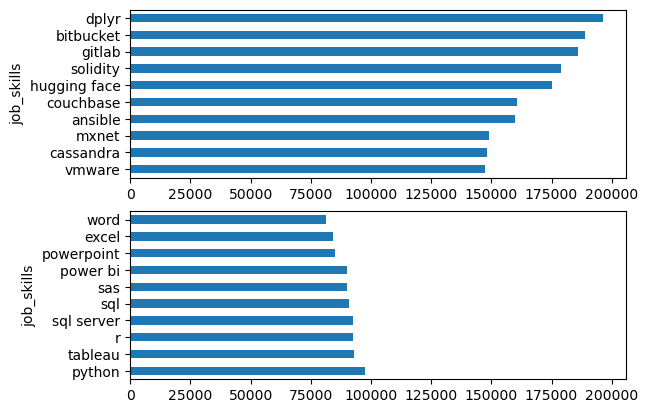

In [18]:
fig, ax = plt.subplots(2, 1)

df_DA_toppay.plot(kind='barh', y = 'median', ax=ax[0], legend=False)
ax[0].invert_yaxis()

df_DA_skills.plot(kind='barh', y = 'median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())

Problems

In [12]:
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].copy()
df_DS_US = df_DS_US.dropna(subset=['salary_hour_avg'])

<function matplotlib.pyplot.show(close=None, block=None)>

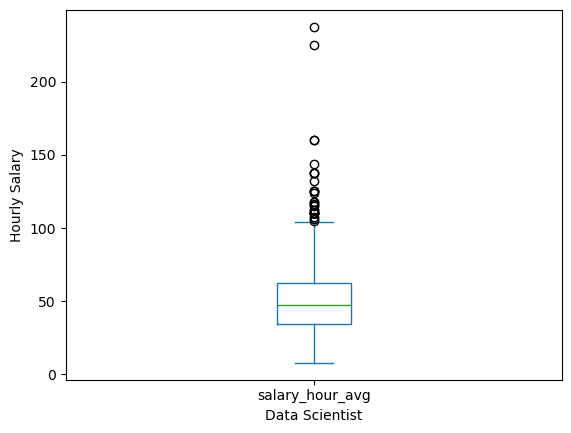

In [13]:
df_DS_US.salary_hour_avg.plot(kind='box')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary')
plt.show

In [22]:
countries = ['United States', 'Canada']
df_DA_USnC = df[(df['job_title_short']=='Data Analyst') & (df['job_country'].isin(['United States', 'Canada']))]
df_DA_USnC = df_DA_USnC.dropna(subset=['salary_hour_avg'])

In [23]:
country_data = [df_DA_USnC[df_DA_USnC['job_country']== country]['salary_hour_avg'] for country in countries]

C:\Users\nhemh\AppData\Local\Temp\ipykernel_18268\3466877124.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_data, labels= countries)


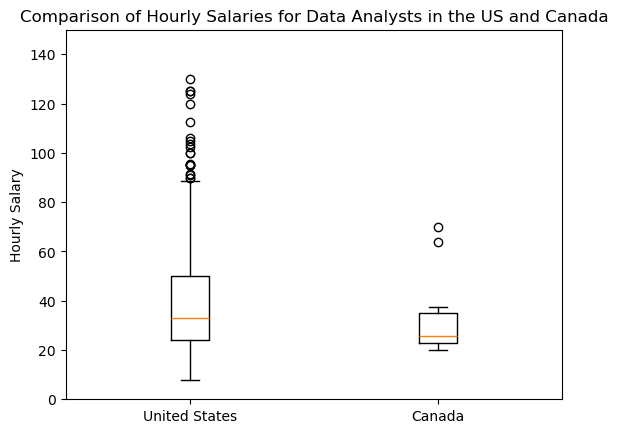

In [25]:
plt.boxplot(country_data, labels= countries)
plt.xlabel('')
plt.ylabel('Hourly Salary')
plt.ylim(0, 150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()

In [49]:
job_titles= ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_job_titles = df_filtered = df[(df['job_title_short'].isin(['Data Analyst', 'Data Engineer', 'Data Scientist'])) & (df['job_country'] == 'Canada')]
df_job_titles = df_job_titles.dropna(subset=['salary_hour_avg'])

job_list = [df_job_titles[df_job_titles['job_title_short']== job]['salary_hour_avg'] for job in job_titles]

C:\Users\nhemh\AppData\Local\Temp\ipykernel_18268\2959189037.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles)


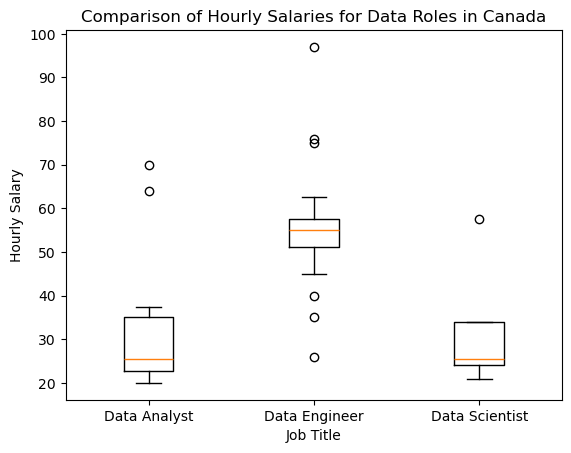

In [51]:
fig, ax = plt.subplots()

plt.boxplot(job_list, labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary')
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()